In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
plt.style.use('ggplot')

# A. Messi's Club Career Goals

### *Analysis on this section is performed using the Data collected from Kaggle and Transfermarkt.*

### 1. Exploring the Dataset

In [45]:
df1 = pd.read_csv('messi_club.csv')
df1.tail()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
689,22/23,Ligue 1,9,10-01-22,H,Paris Saint-Germain,OGC Nice,2:01,AM,28,1:0,Direct free kick,NaN
690,22/23,UEFA Champions League,Group Stage,10-05-22,A,Paris Saint-Germain,Benfica,1:01,AM,22,0:01,Left-footed shot,Neymar
691,22/23,Ligue 1,12,10-21-22,A,Paris Saint-Germain,AC Ajaccio,0:3,CF,78,0:2,Left-footed shot,Kylian Mbappe
692,22/23,UEFA Champions League,Group Stage,10-25-22,H,Paris Saint-Germain,Maccabi Haifa,7:02,SS,19,1:0,Left-footed shot,Kylian Mbappe
693,22/23,UEFA Champions League,Group Stage,10-25-22,H,Paris Saint-Germain,Maccabi Haifa,7:02,SS,44,4:1,Left-footed shot,Kylian Mbappe


- *Messi has already scored in 4 more games since the last time this dataset was updated. So I added those manually from Transfermarket's website.*

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Season            694 non-null    object
 1   Competition       694 non-null    object
 2   Matchday          694 non-null    object
 3   Date              694 non-null    object
 4   Venue             694 non-null    object
 5   Club              694 non-null    object
 6   Opponent          694 non-null    object
 7   Result            694 non-null    object
 8   Playing_Position  694 non-null    object
 9   Minute            694 non-null    object
 10  At_score          694 non-null    object
 11  Type              693 non-null    object
 12  Goal_assist       482 non-null    object
dtypes: object(13)
memory usage: 70.6+ KB


In [47]:
df1.isna().sum()

Season                0
Competition           0
Matchday              0
Date                  0
Venue                 0
Club                  0
Opponent              0
Result                0
Playing_Position      0
Minute                0
At_score              0
Type                  1
Goal_assist         212
dtype: int64

In [48]:
df1[df1['Type'].isnull()]

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
22,06-Jul,LaLiga,37,06-09-07,H,FC Barcelona,RCD Espanyol Barcelona,2:02,RW,43,1:01,NaN,Gianluca Zambrotta


- *We have this one game whose type of goal isn't given. It wasn't available in the Transfermarkt website too, so ignoring this.*

## 1. Goals by Competition, Venue, Type, Playing Position.

### a. By Competition

In [49]:
df1_competition = df1['Competition'].value_counts()
df1_competition

LaLiga                   474
UEFA Champions League    129
Copa del Rey              56
Supercopa                 14
Ligue 1                   12
FIFA Club World Cup        5
UEFA Super Cup             3
Trophée des Champions      1
Name: Competition, dtype: int64

### b. By Venue (Home and Away Goals)

In [50]:
venue = df1['Venue'].value_counts()
venue

H    414
A    280
Name: Venue, dtype: int64

### c. Goal Types

In [51]:
goal_type = df1['Type'].value_counts() [:5]
goal_type

Left-footed shot     430
Penalty               84
Right-footed shot     83
Direct free kick      51
Header                24
Name: Type, dtype: int64

### d. Goals Per Playing Position

In [52]:
position = df1['Playing_Position'].value_counts()
position

CF     270
RW     220
RW      95
CF      40
SS      32
SS      21
AM       8
AM       7
LW       1
Name: Playing_Position, dtype: int64

- *So we can see above, positions have been repeated twice. This could be due to preceding and/or succeeding spaces. So let's remove those.

In [53]:
df1['Playing_Position'] = df1['Playing_Position'].apply(lambda x: x.strip())

In [54]:
position = df1['Playing_Position'].value_counts()
position

RW    315
CF    310
SS     53
AM     15
LW      1
Name: Playing_Position, dtype: int64

In [18]:
import matplotlib.font_manager
x = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
x[:5]

['/usr/share/fonts/truetype/msttcorefonts/Georgia_Italic.ttf',
 '/usr/share/fonts/truetype/kacst/KacstPen.ttf',
 '/usr/share/fonts/truetype/fonts-deva-extra/kalimati.ttf',
 '/usr/share/fonts/opentype/mathjax/MathJax_Size1-Regular.otf',
 '/usr/share/fonts/opentype/mathjax/MathJax_Typewriter-Regular.otf']

### e. Visualisation

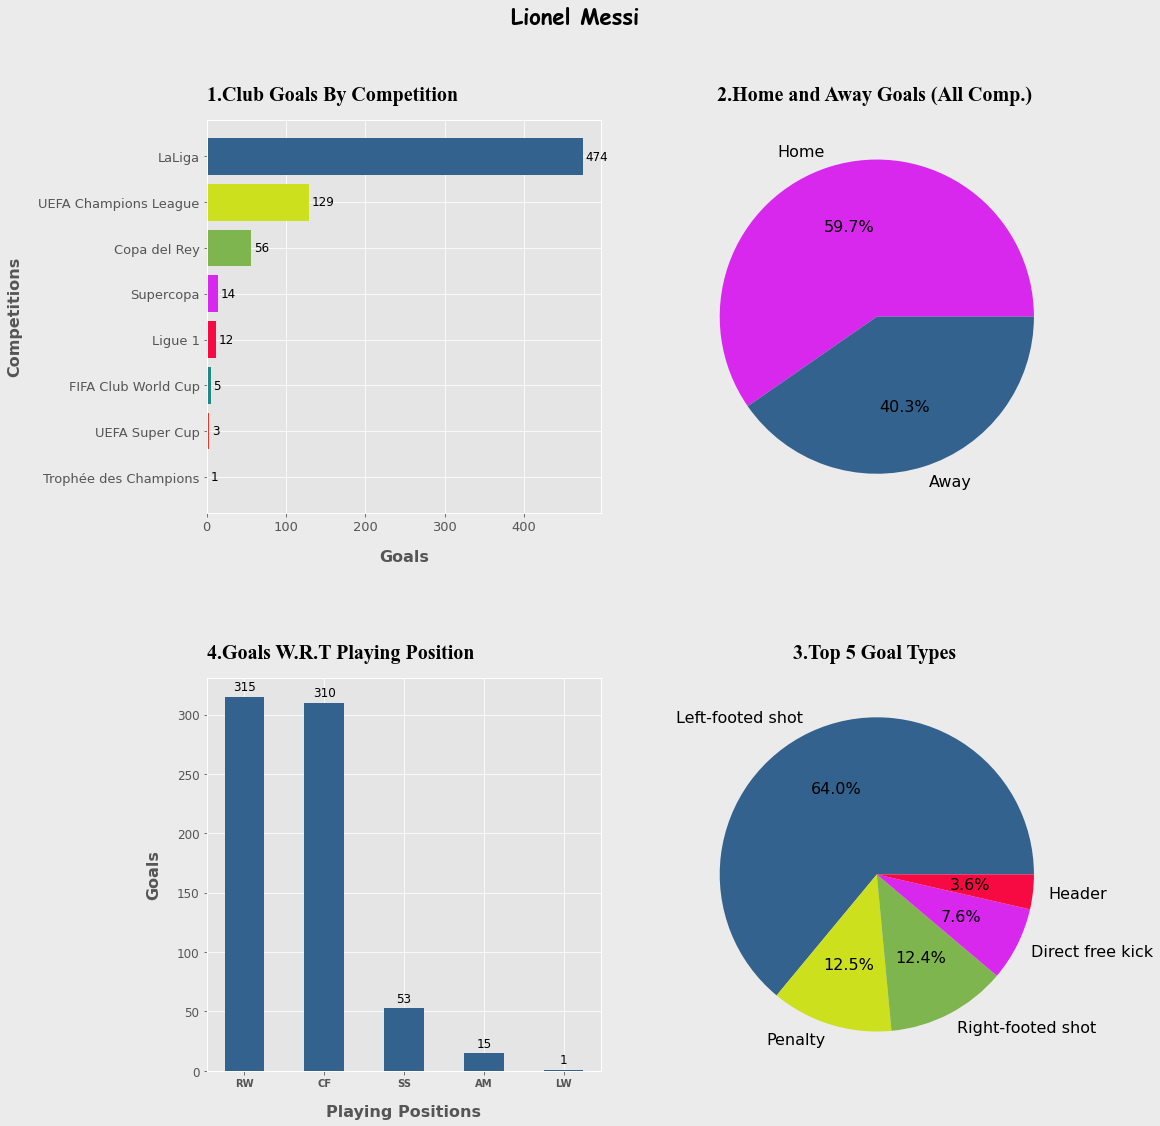

In [57]:


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,18),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax1
color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329','#cde01d']
bars = ax1.barh(df1_competition.index, df1_competition, color = color)
ax1.set_ylabel("Competitions",fontdict=fontdict, labelpad=16)
ax1.set_xlabel("Goals",fontdict=fontdict, labelpad=16)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.bar_label(bars, padding=3, fontsize=12)
ax1.set_title("1.Club Goals By Competition",fontdict=title_fontdict, pad=20,loc='left')
ax1.invert_yaxis() 

# for ax2
color = ['#d928ed','#32628d'] 
labels = ['Home','Away']
bars = ax2.pie(venue,labels=labels, colors = color, autopct='%1.1f%%', textprops={'fontsize': 16})
ax2.set_title("2.Home and Away Goals (All Comp.) ",fontdict=title_fontdict, pad=20)

# for ax3
x = np.arange(len(position))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax3.bar(x, position,width=width, label='Wins',color = "#32628d")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax3.set_xlabel('Playing Positions',labelpad=16, fontdict=fontdict )
ax3.set_ylabel('Goals',labelpad=16, fontdict=fontdict)
ax3.set_title("4.Goals W.R.T Playing Position",fontdict=title_fontdict, pad=20,loc='left')
ax3.set_xticks(x, position.index,weight = 'bold')
ax3.tick_params(axis='y', which='major', labelsize=12)
ax3.bar_label(rects1, padding=3, fontsize=12)

# for ax4
color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41']
bars = ax4.pie(goal_type,labels=goal_type.index, colors = color, autopct='%1.1f%%', textprops={'fontsize': 16})
ax4.set_title("3.Top 5 Goal Types ",fontdict=title_fontdict, pad=20)

fig.suptitle('Lionel Messi',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.92)
fig.tight_layout(pad=8.0)
plt.show()

## 2. Favourite Opponents

### a. Overall Opponents

In [59]:
opponents = df1['Opponent'].value_counts()[:9]
opponents

Sevilla FC                38
Atletico de Madrid        32
Valencia CF               31
Athletic Bilbao           29
Real Betis Balompie       26
Real Madrid               26
CA Osasuna                25
RCD Espanyol Barcelona    25
Levante UD                24
Name: Opponent, dtype: int64

### b. League Opponents (Laliga Only)

In [60]:
laliga_opponents = df1[df1['Competition']=="LaLiga" ] ['Opponent'].value_counts() [:9]
laliga_opponents

Sevilla FC                30
Valencia CF               27
Atletico de Madrid        26
CA Osasuna                23
Levante UD                23
RCD Espanyol Barcelona    22
Real Betis Balompie       22
Deportivo de La Coruaa    20
SD Eibar                  20
Name: Opponent, dtype: int64

### c. Champions League Opponents

In [61]:
ucl_opponents = df1[df1['Competition']=="UEFA Champions League" ] ['Opponent'].value_counts()[:8]
ucl_opponents

Arsenal FC             9
Celtic FC              8
AC Milan               8
Manchester City        7
Bayer 04 Leverkusen    7
Paris Saint-Germain    6
Ajax Amsterdam         6
Olympique Lyon         5
Name: Opponent, dtype: int64

### d. Goals against Premier League Clubs ( Can he do it on a cold rainy night in Stoke?)

In [62]:
pl_clubs = ['Arsenal FC','Manchester City','Chelsea FC','Tottenham Hotspur', 'Manchester United','Liverpool FC']
against_pl = df1[df1['Opponent'].isin(pl_clubs)]['Opponent'].value_counts()
against_pl

Arsenal FC           9
Manchester City      7
Manchester United    4
Chelsea FC           3
Tottenham Hotspur    2
Liverpool FC         2
Name: Opponent, dtype: int64

### e. Visualisation

In [63]:

colors = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329','#cde01d', 'grey','orange','maoroon','black','#06bd4f']
fontdict = {'fontsize':18, 'fontweight':'bold','fontname':'Times New Roman'}

def hor_line_chart(ax,value,title,colors=color):
    ax.hlines(value.index, xmin=0,
            xmax=value, colors=colors, linewidth=3)
  
    ax.plot(value, value.index, "o")
    ax.set_xlim(0)
    ax.invert_yaxis()
    ax.set_xlabel("Goals",fontdict=fontdict, labelpad=16)
#     ax.set_ylabel('Opponent Teams',fontsize = 14, labelpad=16)
    ax.tick_params(axis='both', which='major', labelsize=13)

    ax.set_title(title, fontdict=title_fontdict)
    ax.set_yticks(value.index)
  

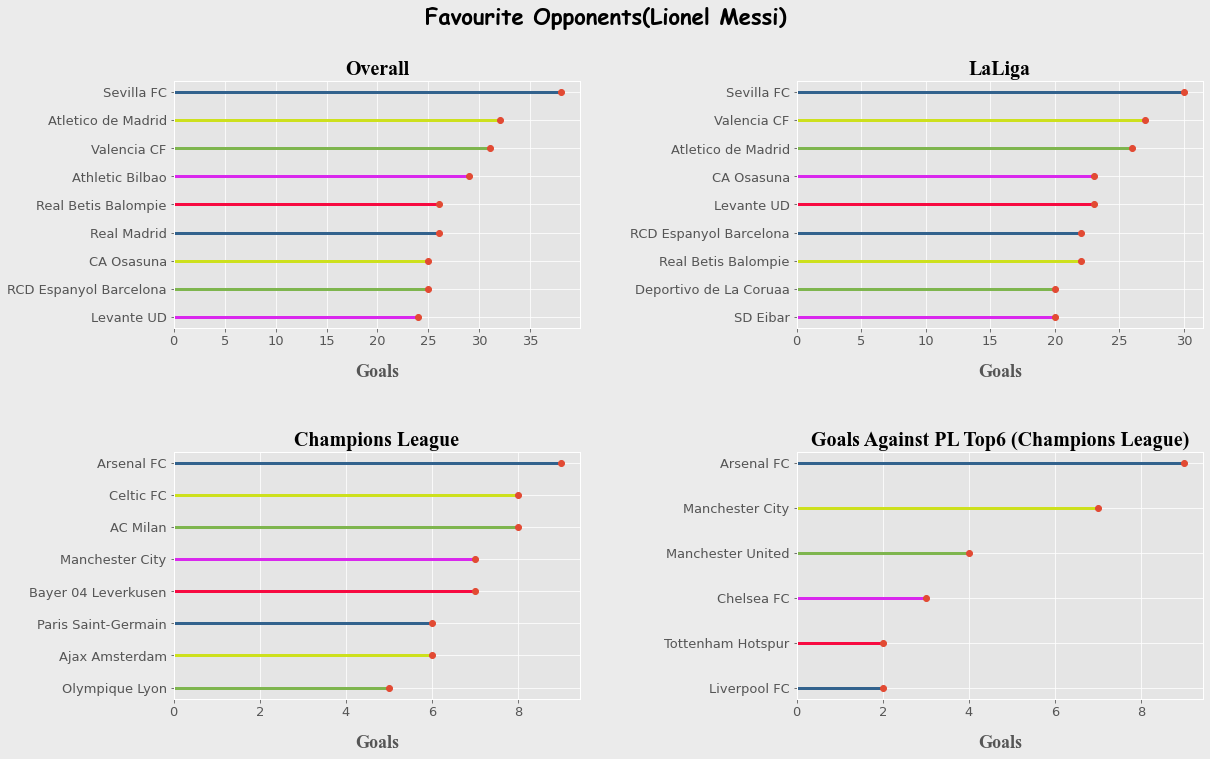

In [64]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(18,12),facecolor=(.92, .92, .92))

hor_line_chart(ax1,opponents,"Overall")
hor_line_chart(ax2,laliga_opponents,"LaLiga")
hor_line_chart(ax3,ucl_opponents,"Champions League")
hor_line_chart(ax4,against_pl,"Goals Against PL Top6 (Champions League)")

fig.suptitle('Favourite Opponents(Lionel Messi)',fontweight = "bold",fontname="Cursive",fontsize=22,y=0.92)
fig.tight_layout(pad=5.0)
plt.show()

## 3. Goals Minute Analysis

### a. Data Preparation

In [65]:
df1.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04-May,LaLiga,34,05-01-05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11-02-05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [66]:
df1['Minute'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 694 entries, 0 to 693
Series name: Minute
Non-Null Count  Dtype 
--------------  ----- 
694 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


- *Messi's Extra Time Goals* 

- *We have to calculate 1st half extra time goals using the below technique, we couldve converted to int and added but 45+1 = 46 which would fall into second half category and would be hard to filter.*

In [67]:
first_half_extra_time = df1[df1['Minute'].str.startswith('45+')]
first_half_extra_time

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
200,11-Dec,UEFA Champions League,Group Stage,11-01-11,A,FC Barcelona,FC Viktoria Plzen,0:04,CF,45+2,0:02,Left-footed shot,Adriano
371,14/15,LaLiga,14,12-07-14,H,FC Barcelona,RCD Espanyol Barcelona,5:01,RW,45+1,1:01,Left-footed shot,Xavi
589,18/19,LaLiga,28,3/17/19,A,FC Barcelona,Real Betis Balompie,1:04,SS,45+2,0:02,Left-footed shot,Luis Suarez
610,19/20,LaLiga,13,11-09-19,H,FC Barcelona,Celta de Vigo,4:01,RW,45+1,2:01,Direct free kick,NaN
642,20/21,LaLiga,14,12/19/20,H,FC Barcelona,Valencia CF,2:02,CF,45+4,1:01,Header,NaN
651,20/21,LaLiga,23,2/13/21,H,FC Barcelona,Deportivo Alaves,5:01,CF,45+1,2:00,Left-footed shot,Sergio Busquets


In [68]:
def convert_to_int(x):
    if not x.startswith('45+'): # we have already counted 1st half injury time goals
        x=x.split('+')
        return sum([int(x) for x in x])

In [69]:
df1['Minute']=df1['Minute'].apply(convert_to_int)
df1.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04-May,LaLiga,34,05-01-05,H,FC Barcelona,Albacete Balompie,2:00,CF,91.0,2:00,Left-footed shot,Ronaldinho Gaacho
1,05-Jun,UEFA Champions League,Group Stage,11-02-05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34.0,3:00,Left-footed shot,NaN
2,05-Jun,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51.0,2:00,Left-footed shot,Samuel Etoo
3,05-Jun,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50.0,2:01,Left-footed shot,Mark van Bommel
4,05-Jun,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82.0,2:00,Left-footed shot,Ronaldinho Gaacho


In [70]:
before_26 = df1[df1['Minute']<26].groupby('Minute').count() ['Matchday']
in_26_to_half = df1[(df1['Minute']>=26) & (df1['Minute']<=45)] # we have more things to do with this
in_45_to_70 = df1[(df1['Minute']>45) & (df1['Minute']<70)].groupby('Minute').count() ['Matchday']
in_70_to_end = df1[(df1['Minute']>=70) & (df1['Minute']<=99)].groupby('Minute').count() ['Matchday']

- We also have to add the first half extra time goals to the 30-half category.

In [71]:
in_26_to_half = pd.concat([in_26_to_half,first_half_extra_time])
in_26_to_half.tail()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
371,14/15,LaLiga,14,12-07-14,H,FC Barcelona,RCD Espanyol Barcelona,5:01,RW,45+1,1:01,Left-footed shot,Xavi
589,18/19,LaLiga,28,3/17/19,A,FC Barcelona,Real Betis Balompie,1:04,SS,45+2,0:02,Left-footed shot,Luis Suarez
610,19/20,LaLiga,13,11-09-19,H,FC Barcelona,Celta de Vigo,4:01,RW,45+1,2:01,Direct free kick,NaN
642,20/21,LaLiga,14,12/19/20,H,FC Barcelona,Valencia CF,2:02,CF,45+4,1:01,Header,NaN
651,20/21,LaLiga,23,2/13/21,H,FC Barcelona,Deportivo Alaves,5:01,CF,45+1,2:00,Left-footed shot,Sergio Busquets


In [72]:
in_26_to_half = in_26_to_half.groupby('Minute').count() ['Matchday']

### b. Visualisation

In [73]:
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}
width = 0.5  # the width of the bars

def bar_chart(ax,value,title,color):
    x = np.arange(len(value))  # the label locations
    rects1 = ax.bar(x, value,width=width, label='Wins',color = color)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Minutes',labelpad=16, fontdict=fontdict )
    ax.set_ylabel('Goals',labelpad=16, fontdict=fontdict)
    ax.set_title(title,fontdict=title_fontdict, pad=20,loc='left')
    ax.set_xticks(x, value.index,weight = 'bold',rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=12)

    ax.bar_label(rects1, padding=3, fontsize=12)


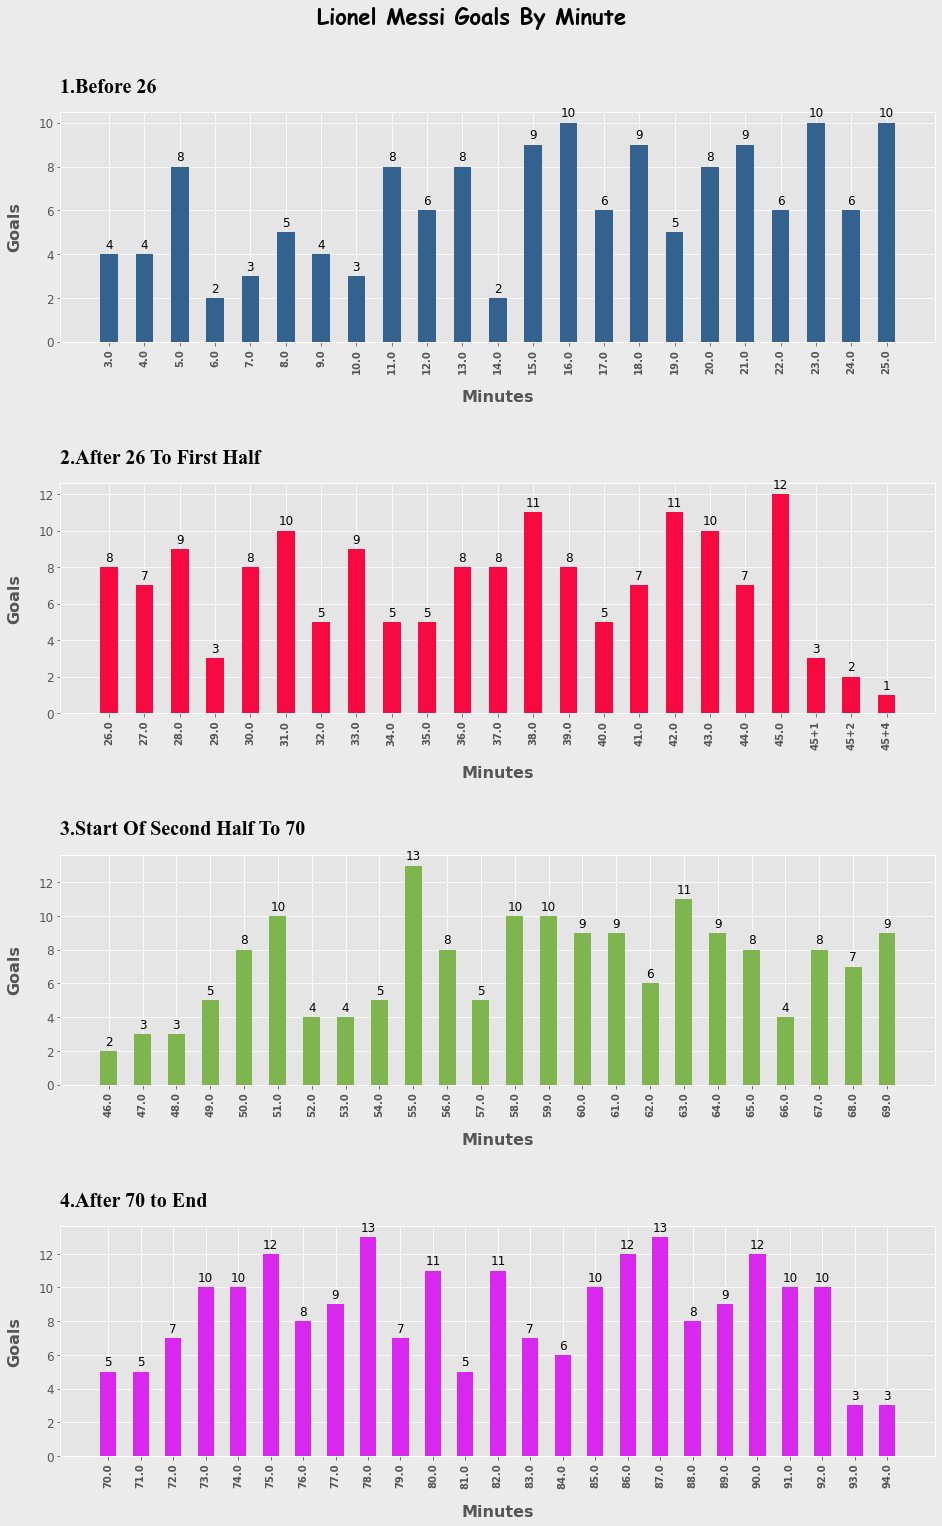

In [74]:
fig, ((ax1, ax2,ax3,ax4)) = plt.subplots(4,1,figsize=(14,22),facecolor=(.92, .92, .92))

bar_chart(ax1,before_26,'1.Before 26','#32628d')
bar_chart(ax2,in_26_to_half,'2.After 26 To First Half','#f70a41')
bar_chart(ax3,in_45_to_70,'3.Start Of Second Half To 70','#7eb54e')
bar_chart(ax4,in_70_to_end,'4.After 70 to End','#d928ed')
fig.suptitle('Lionel Messi Goals By Minute',fontweight = "bold",fontsize=22, fontname="Cursive")
fig.tight_layout(pad=4.0)

plt.show()

## 4. Most Assists ( To Messi )

In [75]:
assisters = df1['Goal_assist'].value_counts() [:10]

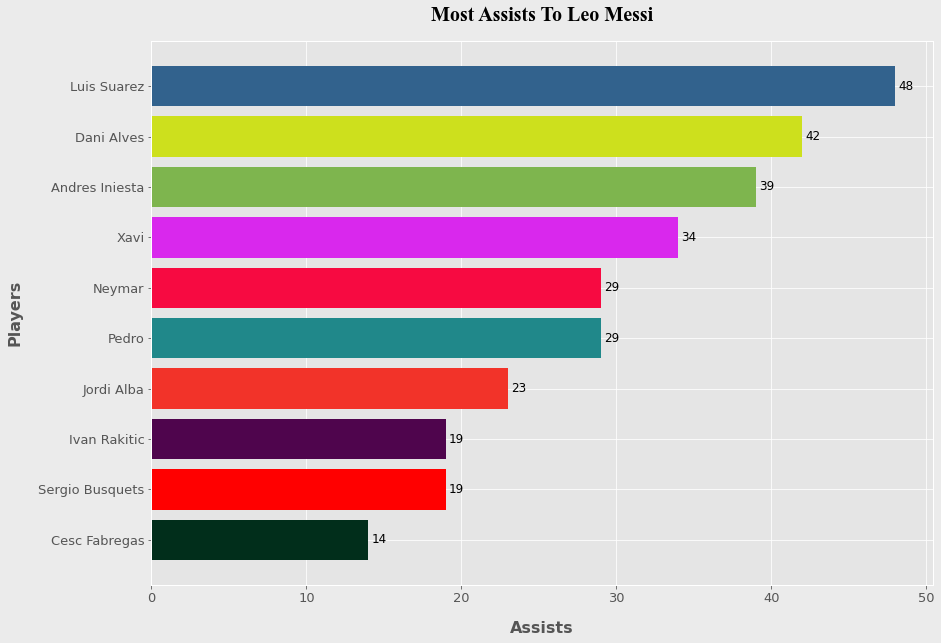

In [76]:
fig, ax = plt.subplots(figsize=(14,10),facecolor=(.92, .92, .92))

color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329','#4f054d','red','#012e1b']
bars = ax.barh(assisters.index, assisters, color = color)
ax.set_ylabel("Players",fontdict=fontdict, labelpad=16)
ax.set_xlabel("Assists",fontdict=fontdict, labelpad=16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.bar_label(bars, padding=3, fontsize=12)
ax.set_title("Most Assists To Leo Messi",fontdict=title_fontdict, pad=20)
ax.invert_yaxis() 

plt.show()

## 5. Messi League Only

### *Analysis on this section is performed using the data scraped from Fbref.*

### a. Data Preparation

In [77]:
df2 = pd.read_csv('messi_fbref.csv')
df2

,Unnamed: 0,Season,Min,Goals,Gls/90,Assists,Ast/90,SoT,SoT/90,G/SoT
0,0,2004-2005,70,1,1.29,0,0.00,4,5.14,0.25
1,1,2005-2006,911,6,0.59,3,0.30,23,2.27,0.26
2,2,2006-2007,1983,14,0.64,3,0.14,32,1.45,0.44
3,3,2007-2008,1973,10,0.46,12,0.55,33,1.51,0.18
4,4,2008-2009,2516,23,0.82,11,0.39,55,1.97,0.36
5,5,2009-2010,2805,34,1.09,9,0.29,104,3.34,0.32
6,6,2010-2011,2858,31,0.98,19,0.60,76,2.39,0.36
7,7,2011-2012,3270,50,1.38,16,0.44,114,3.14,0.35
8,8,2012-2013,2650,46,1.56,11,0.37,90,3.06,0.47
9,9,2013-2014,2501,28,1.01,11,0.40,79,2.84,0.27


- *We can see that we only need first 19 rows (0 to 18). So let's remove unwanted rows.*

In [78]:
df2 = df2[:19]
df2.tail()

,Unnamed: 0,Season,Min,Goals,Gls/90,Assists,Ast/90,SoT,SoT/90,G/SoT
14,14,2018-2019,2713,36,1.19,13,0.43,85,2.82,0.38
15,15,2019-2020,2880,25,0.78,21,0.66,63,1.97,0.32
16,16,2020-2021,3023,30,0.89,9,0.27,85,2.53,0.32
17,17,2021-2022,2153,6,0.25,14,0.59,28,1.17,0.21
18,18,2022-2023,963,6,0.56,9,0.84,27,2.52,0.22


In [79]:
df2['Season'].head()

0    2004-2005
1    2005-2006
2    2006-2007
3    2007-2008
4    2008-2009
Name: Season, dtype: object

*-Converting all the columns to Numeric except the 'Season' column.*

In [80]:
cols_to_numeric = df2.columns.drop('Season')
df2[cols_to_numeric] = df2[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

/tmp/ipykernel_81415/292036310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[cols_to_numeric] = df2[cols_to_numeric].apply(pd.to_numeric, errors='coerce')


In [81]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19 non-null     int64  
 1   Season      19 non-null     object 
 2   Min         19 non-null     int64  
 3   Goals       19 non-null     int64  
 4   Gls/90      19 non-null     float64
 5   Assists     19 non-null     int64  
 6   Ast/90      19 non-null     float64
 7   SoT         19 non-null     int64  
 8   SoT/90      19 non-null     float64
 9   G/SoT       19 non-null     float64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ KB


### b. Visualisation 1

In [82]:
def line_plot(ax, x, y1, y2, y1_label, y2_label, x_label, y_label, title, yticks=None):
    ax.plot(x,y1,marker='o',color='b', label=y1_label)
    ax.plot(x,y2,marker='o',color='r', label=y2_label)

    ax.set_xlabel(x_label,fontdict=fontdict,labelpad=20)
    ax.set_ylabel(y_label,fontdict=fontdict,labelpad=20)

    if yticks:
        ax.set_yticks(yticks)
        
    ax.set_xticks(np.arange(len(x)),x,weight = 'bold',rotation=60)
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.set_title(title, pad=20, fontdict=title_fontdict,loc="left")

    ax.legend()

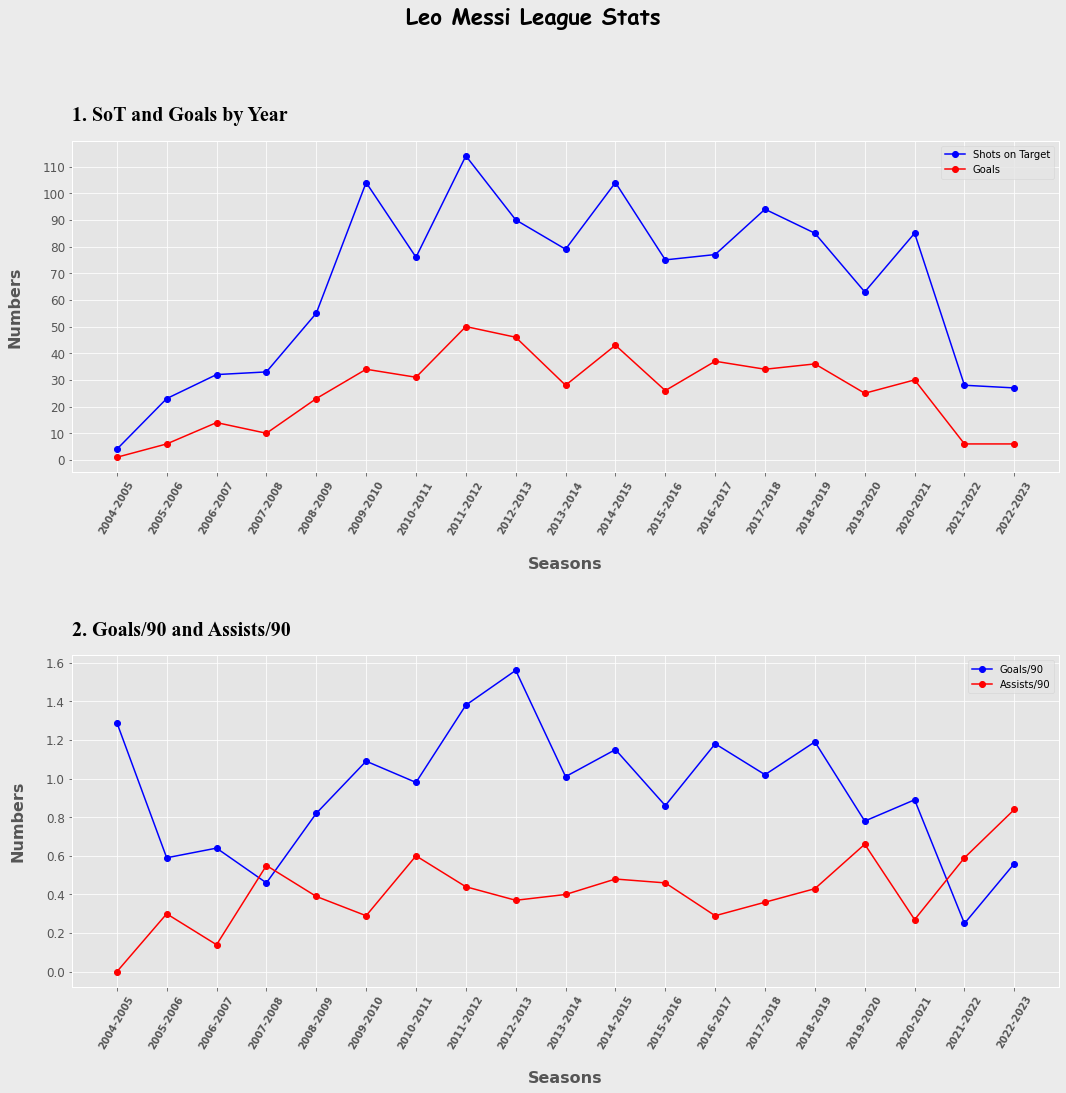

In [83]:

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(16,16),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# ax1
yticks_1 = [i for i in range(0,max(df2['SoT']),10)] 
line_plot(ax1,df2['Season'],df2['SoT'],df2['Goals'],"Shots on Target","Goals","Seasons","Numbers","1. SoT and Goals by Year",yticks_1)

# ax2
line_plot(ax2,df2['Season'],df2['Gls/90'],df2['Ast/90'],"Goals/90","Assists/90","Seasons","Numbers","2. Goals/90 and Assists/90")

fig.suptitle('Leo Messi League Stats',fontweight = "bold",fontname="Cursive",fontsize=22,)
fig.tight_layout(pad=5.0)
plt.show()

### 2. Visualisation 2

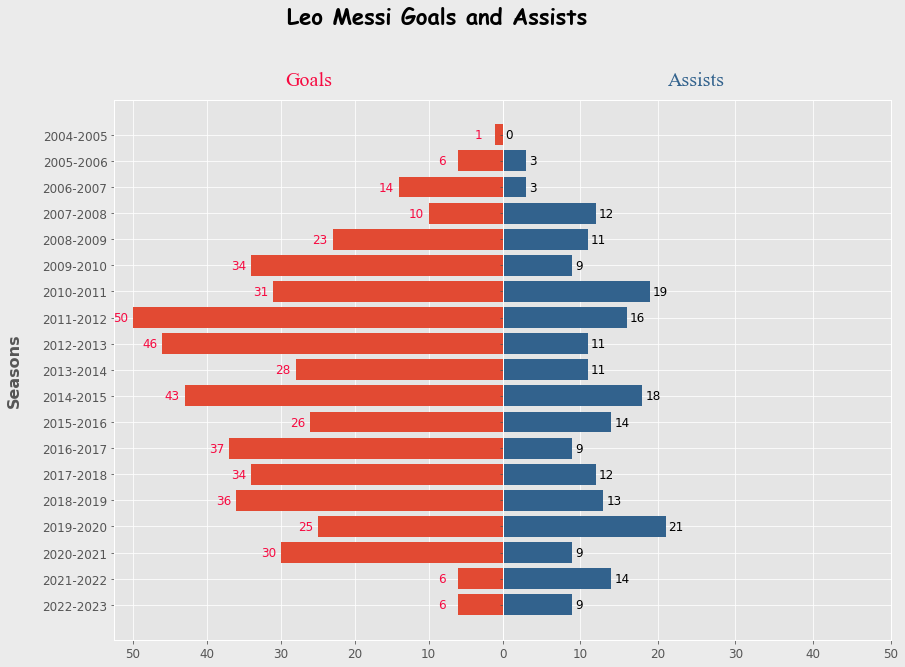

In [84]:
hfont = {'fontname':'Times New Roman'}
color_red = '#f70a41'
color_blue = '#32628d'
fontdict = {'fontsize':16, 'fontweight':'bold'}
xticks = [10,20,30,40,50]

fig, axes = plt.subplots(figsize=(14,10), ncols=2, sharey=True,facecolor=(.92, .92, .92))
fig.tight_layout()

bars1 = axes[0].barh(df2['Season'], df2['Goals'], align='center',  zorder=10)
axes[0].set_title("Goals", fontsize=20, pad=15, color=color_red, **hfont )
bars2 = axes[1].barh(df2['Season'], df2['Assists'], align='center', color=color_blue)
axes[1].set_title("Assists", fontsize=20, pad=15, color=color_blue, **hfont)

axes[0].invert_xaxis() 
# To show data from highest to lowest
plt.gca().invert_yaxis()

axes[0].bar_label(bars1, padding=-20, fontsize=12,color=color_red)
axes[1].bar_label(bars2, padding=3, fontsize=12)

axes[1].set_xticks(xticks)
axes[0].set(yticks=df2['Season'], yticklabels=df2['Season'])
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='both',which='major', labelsize=12) 
axes[1].tick_params(axis='x',which='major', labelsize=12) 

axes[0].set_ylabel("Seasons",fontdict=fontdict,labelpad=20)

fig.suptitle('Leo Messi Goals and Assists',fontweight = "bold",fontname="Cursive",fontsize=22,)
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.show()
    

## 6. International Stats

### *Analysis in this section is performed using the data scrapped from Transfermarkt.*

In [92]:
df3 = pd.read_csv('messi_international.csv')
df3.head()

,Unnamed: 0,Competition,Matchday,Date,Home Team,Away Team,Result,Position,Goals,Minutes Played
0,0,International Friendlies,International Friendlies,"Mar 1, 2006",Croatia,Argentina,3:2,RM,1,90'
1,1,World Cup 2006,Group C,"Jun 16, 2006",Argentina,Serbia-Mont.,6:0,RM,1,16'
2,2,International Friendlies,International Friendlies,"Jun 5, 2007",Algeria,Argentina,3:4,RW,2,90'
3,3,Copa América 2007,Quarter-Finals,"Jul 9, 2007",Argentina,Peru,4:0,SS,1,90'
4,4,Copa América 2007,Semi-Finals,"Jul 12, 2007",Mexico,Argentina,0:3,SS,1,90'


### a. Goals by Competition

In [93]:
competition = df3.groupby('Competition')['Goals'].sum()
competition

Competition
Copa América 2007                         2
Copa América 2015                         1
Copa América 2019                         1
Copa América 2021                         4
Copa América Centenario 2016              5
International Friendlies                 43
World Cup 2006                            1
World Cup 2014                            4
World Cup 2018                            1
World Cup qualification South America    28
Name: Goals, dtype: int64

In [94]:
comps = ['Frendlies','World Cup Qualifiers','Copa America','World Cup']
goals = [43,28,sum(competition[:5]),sum(competition[6:9])]
sum(goals)

90

### B. Favourite Teams

In [95]:
df3['Against'] = df3['Away Team']
df3.head()

,Unnamed: 0,Competition,Matchday,Date,Home Team,Away Team,Result,Position,Goals,Minutes Played,Against
0,0,International Friendlies,International Friendlies,"Mar 1, 2006",Croatia,Argentina,3:2,RM,1,90',Argentina
1,1,World Cup 2006,Group C,"Jun 16, 2006",Argentina,Serbia-Mont.,6:0,RM,1,16',Serbia-Mont.
2,2,International Friendlies,International Friendlies,"Jun 5, 2007",Algeria,Argentina,3:4,RW,2,90',Argentina
3,3,Copa América 2007,Quarter-Finals,"Jul 9, 2007",Argentina,Peru,4:0,SS,1,90',Peru
4,4,Copa América 2007,Semi-Finals,"Jul 12, 2007",Mexico,Argentina,0:3,SS,1,90',Argentina


In [96]:
home_against = df3[df3['Home Team'] != "Argentina"]
home_against

,Unnamed: 0,Competition,Matchday,Date,Home Team,Away Team,Result,Position,Goals,Minutes Played,Against
0,0,International Friendlies,International Friendlies,"Mar 1, 2006",Croatia,Argentina,3:2,RM,1,90',Argentina
2,2,International Friendlies,International Friendlies,"Jun 5, 2007",Algeria,Argentina,3:4,RW,2,90',Argentina
4,4,Copa América 2007,Semi-Finals,"Jul 12, 2007",Mexico,Argentina,0:3,SS,1,90',Argentina
5,5,World Cup qualification South America,Group A,"Oct 17, 2007",Venezuela,Argentina,0:2,SS,1,90',Argentina
6,6,World Cup qualification South America,Group A,"Nov 21, 2007",Colombia,Argentina,2:1,SS,1,90',Argentina
7,7,International Friendlies,International Friendlies,"Jun 5, 2008",Mexico,Argentina,1:4,AM,1,85',Argentina
9,9,International Friendlies,International Friendlies,"Feb 11, 2009",France,Argentina,0:2,SS,1,90',Argentina
11,11,International Friendlies,International Friendlies,"Nov 14, 2009",Spain,Argentina,2:1,SS,1,84',Argentina
14,14,International Friendlies,International Friendlies,"Feb 9, 2011",Portugal,Argentina,1:2,CF,1,90',Argentina
17,17,World Cup qualification South America,Group A,"Nov 15, 2011",Colombia,Argentina,1:2,SS,1,90',Argentina


In [97]:
for index in home_against.index:
    df3['Against'][index] = home_against['Home Team'][index]

/tmp/ipykernel_81415/1801883870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Against'][index] = home_against['Home Team'][index]


In [98]:
df3.head(10)

,Unnamed: 0,Competition,Matchday,Date,Home Team,Away Team,Result,Position,Goals,Minutes Played,Against
0,0,International Friendlies,International Friendlies,"Mar 1, 2006",Croatia,Argentina,3:2,RM,1,90',Croatia
1,1,World Cup 2006,Group C,"Jun 16, 2006",Argentina,Serbia-Mont.,6:0,RM,1,16',Serbia-Mont.
2,2,International Friendlies,International Friendlies,"Jun 5, 2007",Algeria,Argentina,3:4,RW,2,90',Algeria
3,3,Copa América 2007,Quarter-Finals,"Jul 9, 2007",Argentina,Peru,4:0,SS,1,90',Peru
4,4,Copa América 2007,Semi-Finals,"Jul 12, 2007",Mexico,Argentina,0:3,SS,1,90',Mexico
5,5,World Cup qualification South America,Group A,"Oct 17, 2007",Venezuela,Argentina,0:2,SS,1,90',Venezuela
6,6,World Cup qualification South America,Group A,"Nov 21, 2007",Colombia,Argentina,2:1,SS,1,90',Colombia
7,7,International Friendlies,International Friendlies,"Jun 5, 2008",Mexico,Argentina,1:4,AM,1,85',Mexico
8,8,World Cup qualification South America,Group A,"Oct 11, 2008",Argentina,Uruguay,2:1,RM,1,89',Uruguay
9,9,International Friendlies,International Friendlies,"Feb 11, 2009",France,Argentina,0:2,SS,1,90',France


In [99]:
against = df3.groupby('Against')['Goals'].sum().sort_values(ascending=False)[:8]
against

Against
Bolivia      8
Uruguay      6
Ecuador      6
Venezuela    5
Brazil       5
Chile        5
Paraguay     5
Estonia      5
Name: Goals, dtype: int64

### c. Visualisation

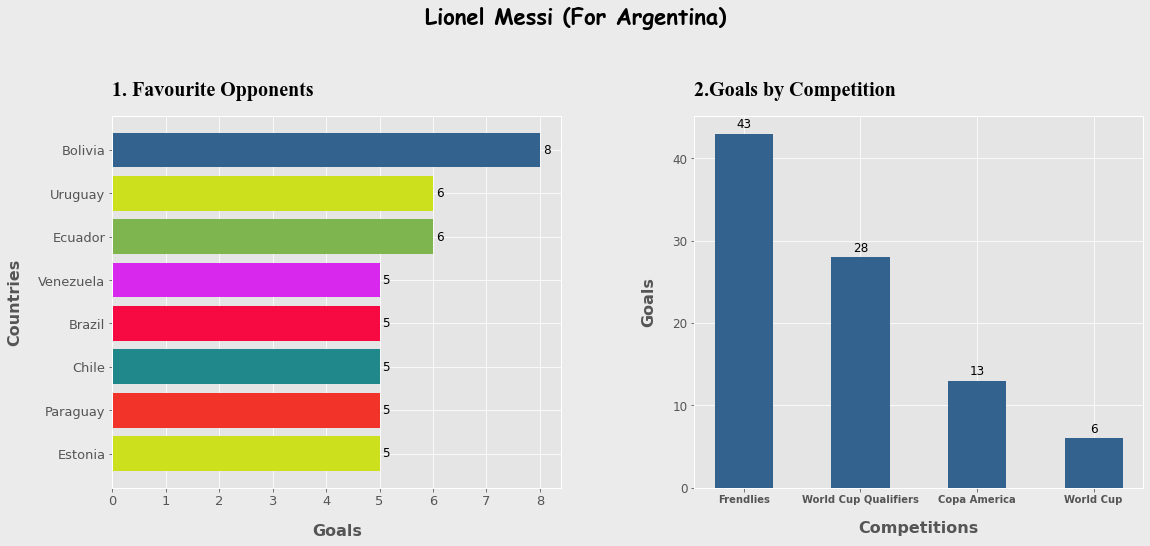

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,10),facecolor=(.92, .92, .92))
fontdict = {'fontsize':16, 'fontweight':'bold'}
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}

# for ax1
color = ['#32628d', '#cde01d', '#7eb54e', '#d928ed','#f70a41','#20888a','#f23329','#cde01d']
bars = ax1.barh(against.index, against, color = color)
ax1.set_ylabel("Countries",fontdict=fontdict, labelpad=16)
ax1.set_xlabel("Goals",fontdict=fontdict, labelpad=16)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax1.bar_label(bars, padding=3, fontsize=12)
ax1.set_title("1. Favourite Opponents",fontdict=title_fontdict, pad=20,loc='left')
ax1.invert_yaxis() 

# for ax2
x = np.arange(len(comps))  # the label locations
width = 0.5  # the width of the bars
rects1 = ax2.bar(x, goals,width=width, label='Wins',color = "#32628d")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_xlabel('Competitions',labelpad=16, fontdict=fontdict )
ax2.set_ylabel('Goals',labelpad=16, fontdict=fontdict)
ax2.set_title("2.Goals by Competition",fontdict=title_fontdict, pad=20,loc='left')
ax2.set_xticks(x, comps,weight = 'bold')
ax2.tick_params(axis='y', which='major', labelsize=12)

ax2.bar_label(rects1, padding=3, fontsize=12)

fig.suptitle('Lionel Messi (For Argentina)',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.85)
fig.tight_layout(pad=8.0)
plt.show()

## 7. xG and xA Overperformance

### *Analysis in this section is performed using data scraped from Understat*

### a. Data Preparation

In [102]:
df4 = pd.read_csv('messi_understat.csv')
df4.head()

,Unnamed: 0,season,goals,assists,xG,xA,key_passes,shots,minutes,xGChain,xGBuildup
0,0,2022,6,9,8.136113,6.090365,32,51,978,17.294995,8.159149
1,1,2021,6,13,9.880367,8.680599,63,89,2155,27.219424,13.841107
2,2,2020,30,9,26.676843,11.422848,77,195,3017,37.906863,20.337363
3,3,2019,25,20,20.849667,16.593363,88,159,2876,34.923467,13.537658
4,4,2018,36,13,25.997169,15.335166,93,170,2704,38.459877,10.698799


-*We need to update the season column because the data is for seasonal perormance.* 

In [103]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9 non-null      int64  
 1   season      9 non-null      int64  
 2   goals       9 non-null      int64  
 3   assists     9 non-null      int64  
 4   xG          9 non-null      float64
 5   xA          9 non-null      float64
 6   key_passes  9 non-null      int64  
 7   shots       9 non-null      int64  
 8   minutes     9 non-null      int64  
 9   xGChain     9 non-null      float64
 10  xGBuildup   9 non-null      float64
dtypes: float64(4), int64(7)
memory usage: 920.0 bytes


In [104]:
def update_season(season):
    return f"{season}-{season+1}"

In [105]:
df4['season'] = df4['season'].apply(update_season)

In [106]:
df4

,Unnamed: 0,season,goals,assists,xG,xA,key_passes,shots,minutes,xGChain,xGBuildup
0,0,2022-2023,6,9,8.136113,6.090365,32,51,978,17.294995,8.159149
1,1,2021-2022,6,13,9.880367,8.680599,63,89,2155,27.219424,13.841107
2,2,2020-2021,30,9,26.676843,11.422848,77,195,3017,37.906863,20.337363
3,3,2019-2020,25,20,20.849667,16.593363,88,159,2876,34.923467,13.537658
4,4,2018-2019,36,13,25.997169,15.335166,93,170,2704,38.459877,10.698799
5,5,2017-2018,34,12,28.946281,15.100406,87,196,2995,48.180634,21.634404
6,6,2016-2017,37,9,26.885174,13.955131,79,179,2832,42.525045,18.133512
7,7,2015-2016,26,16,27.101910,15.871278,77,158,2726,41.996866,15.196364
8,8,2014-2015,43,18,35.891764,17.611956,95,187,3374,54.753610,19.756724


### b. Visualisation

In [107]:
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}
def hor_bars(ax,labels,data1,data2,label1,label2,title):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax.bar(x - width/2,data1, width, label=label1,color = '#32628d')
    rects2 = ax.bar(x + width/2, data2, width, label=label2, color = '#cde01d')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    fontdict = {'fontsize':18,}
    ax.set_xlabel('Seasons',labelpad=20, fontdict=fontdict )
    ax.set_ylabel('Count',labelpad=20, fontdict=fontdict)
    ax.set_title(title,fontdict=title_fontdict, pad=20)
    ax.set_xticks(x, labels,weight = 'bold')
    ax.tick_params(axis='y', which='major', labelsize=12)
    ax.legend(loc='upper left')

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)


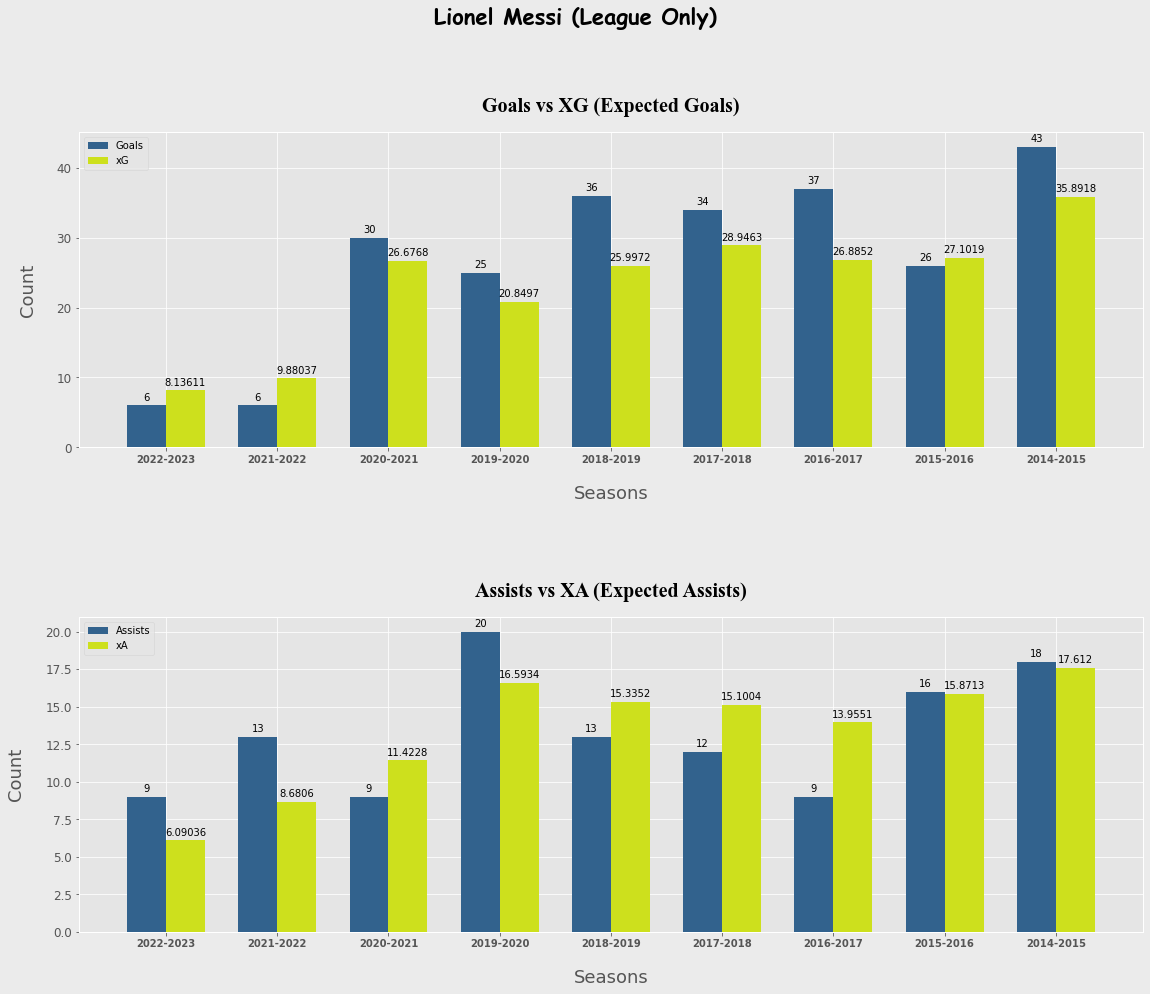

In [108]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(18,16),facecolor=(.92, .92, .92))

hor_bars(ax1,df4['season'],df4['goals'],df4['xG'],"Goals","xG", "Goals vs XG (Expected Goals)")
hor_bars(ax2,df4['season'],df4['assists'],df4['xA'],"Assists","xA", "Assists vs XA (Expected Assists)")

fig.suptitle('Lionel Messi (League Only)',fontweight = "bold",fontsize=22, fontname="Cursive",y=0.92)
fig.tight_layout(pad=8.0)

plt.show()

### 8. Comparision With Others

### *Data source is Understat. Messi's data was scrapped and others where manually collected*

In [109]:
# data source Understat
ronaldo_xg = [39.31,35.59,25.41,27.00,23.32,29.43,29.84,17.21,1.21] [::-1]
ronaldo_shots90 = [4.27,4.01,5.35,6.41,5.85,6.95,5.73,6.41,6.53]

lewa_xg = [17.72,28.46,30.10,27.90,33.14,31.20,32.08,37.92,8.85] [::-1]
lewa_shots90 = [4.26,4.87,4.93,4.50,4.38,5.28,4.63,5.15,3.75]

messi_shots90 = (df4['shots']/df4['minutes'])*90
messi_kp90 = (df4['key_passes']/df4['minutes'])*90

kdb_kp90 = [3.71,3.54,3.54,4.25,3.36,3.05,3.20,3.63,3.30]


In [110]:
messi_shots90

0    4.693252
1    3.716937
2    5.817037
3    4.975661
4    5.658284
5    5.889816
6    5.688559
7    5.216434
8    4.988145
dtype: float64

In [117]:
title_fontdict = {'fontsize':20, 'fontweight':'bold','fontname':'Times New Roman'}
color = ['#f5426c','#a30389','blue']

def line_chart(ax,y,label,y_label,title):

    for  i, y_val in enumerate(y):
        ax.plot(df4['season'], y_val,color=color[i],linewidth=1,linestyle='-',marker='o', label=label[i])
        # ax.plot(df4['season'], lewa_xg,color='#a30389',linewidth=1,linestyle='-',marker='o',label="Lewandowski")
        # ax.plot(df4['season'], ronaldo_xg,color='blue',linewidth=1,linestyle='-',marker='o',label="Ronaldo")

    ax.set_ylabel(y_label,fontsize = 18,labelpad=20)
    ax.set_xlabel("Seasons",fontsize = 18,labelpad=20)
    ax.tick_params(axis='both', which='major', labelsize=13)

    ax.legend()
    ax.set_title(title,fontdict=title_fontdict)

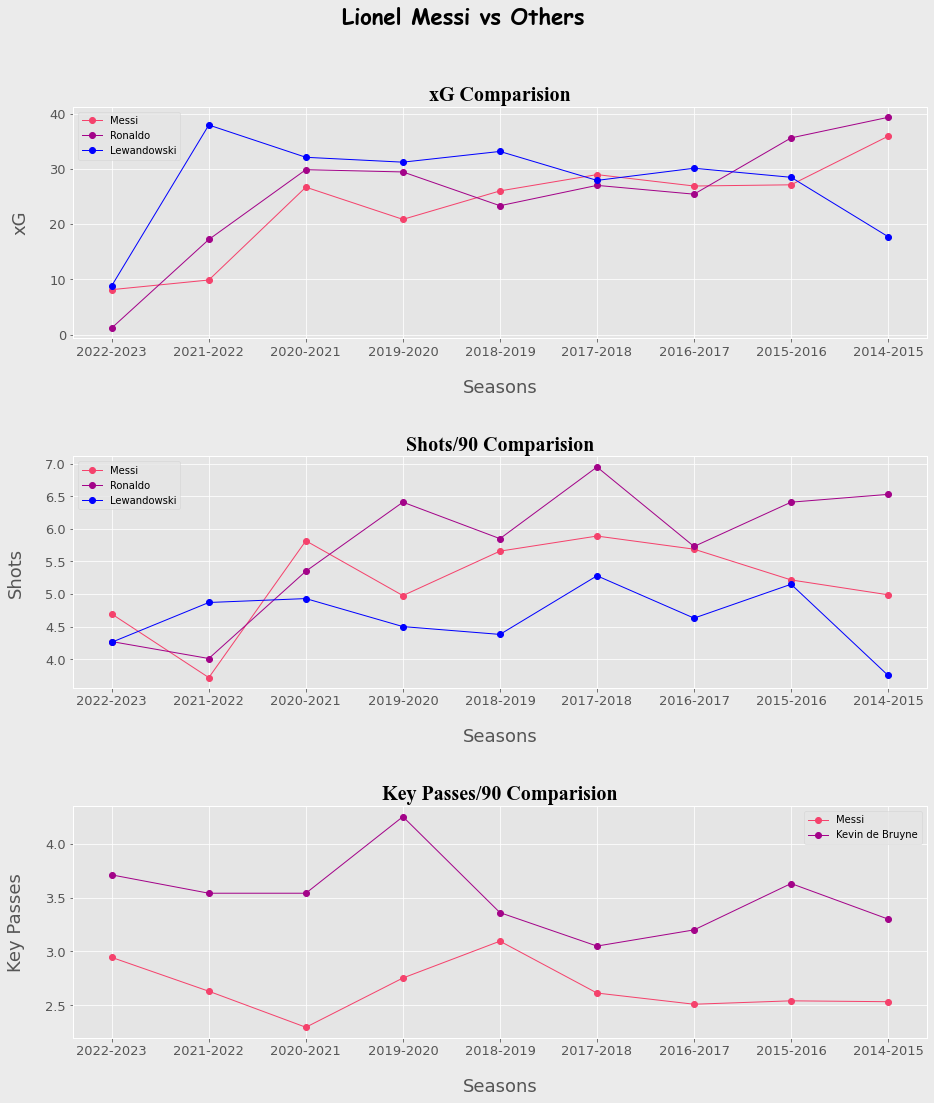

In [118]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(14,16),facecolor=(.92, .92, .92))

# ax1
line_chart(ax1,[df4['xG'],ronaldo_xg,lewa_xg],['Messi','Ronaldo','Lewandowski'],'xG','xG Comparision')

# ax2
line_chart(ax2,[messi_shots90,ronaldo_shots90,lewa_shots90],['Messi','Ronaldo','Lewandowski'],'Shots','Shots/90 Comparision')

# ax3
line_chart(ax3,[messi_kp90,kdb_kp90],['Messi','Kevin de Bruyne'],'Key Passes','Key Passes/90 Comparision')


fig.suptitle('Lionel Messi vs Others',fontweight = "bold",fontsize=22, fontname="Cursive")
fig.tight_layout(pad=4.0)
plt.show()